# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Po-Yen Chen 429195
    
    2. Sourav Kulkarni 417735
    
    3. Hyungjin Kim 429797

## Question 1: Preprocessing (20 points)

In [230]:
import pandas as pd

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [231]:
# your code
df = pd.read_csv("datasets/ski_resorts.csv", index_col= 0)
df

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,75398.0,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,99017.0,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,1932.0,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,32938.0,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,49228.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,NaN,35,7.0,71,96433.0,0.0
373,Sauze d’Oulx (Via Lattea),Italy,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,29.0,35,7.0,71,96433.0,0.0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,31984.0,655.0
375,Champoluc (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,31984.0,655.0


#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [232]:
# your code
display(df.head())
display(df.dtypes)

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,75398.0,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,99017.0,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,1932.0,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,32938.0,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,49228.0,450.0


Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object

**Your Answer:** No, it doesn't have any data type problem. All numerical columns have a numerical column.

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [233]:
# your code
df_new = df.copy()
#defining function filter 
def filter(x):
    if x <= 10627.5:
        return 'low'
    if (x > 10627.5 and x <= 18666.5):
        return 'medium'
    if (x > 18666.5 and x <= 36450.5):
        return 'high'
    if x > 36450.5:
        return 'exclusive high'
#applying the filter function to LifeCapacity column 
df_new['LiftCapacity'] = df_new['LiftCapacity'].apply(filter)
df_new

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,exclusive high,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,exclusive high,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,low,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,high,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,exclusive high,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,NaN,35,7.0,71,exclusive high,0.0
373,Sauze d’Oulx (Via Lattea),Italy,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,29.0,35,7.0,71,exclusive high,0.0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,high,655.0
375,Champoluc (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,high,655.0


**Your Answer:** The column for LifeCapacity contains lots of dataset, so it was essentially needed to change this colume to categorical column. The criteria for this categorization was proportion of numerical data. Depending on 25, 50 and 75 percent, it was devided into four section as Low, Medium, High and Exlclusive high.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [234]:
# your code for 1. How many entries does the dataframe have? (To relate this to the number of entries missing)
display(df_new.describe())

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,SnowCannons
count,363.000000,373.000000,359.000000,368.000000,376.000000,368.000000,376.000000,370.000000,376.000000,369.000000,376.000000,368.000000
mean,2094.088154,1055.520107,41.493036,36.646739,38.348404,12.029891,86.257979,13.548649,9.340426,4.000000,26.957447,223.097826
std,731.209864,423.854126,11.659237,54.039497,49.691136,17.894230,113.740218,14.487788,12.595282,6.616021,31.038957,410.027421
min,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1583.500000,780.000000,34.000000,9.000000,9.000000,2.000000,25.000000,5.000000,2.000000,0.000000,10.000000,0.000000
50%,2118.000000,1050.000000,43.000000,19.000000,22.000000,5.500000,48.000000,9.000000,5.000000,2.000000,17.000000,56.000000
75%,2606.500000,1350.000000,49.000000,40.000000,42.250000,13.250000,100.000000,16.000000,10.000000,5.000000,29.250000,260.000000
max,3899.000000,2180.000000,81.000000,312.000000,239.000000,103.000000,600.000000,89.000000,74.000000,40.000000,174.000000,2383.000000


In [235]:
# your code for 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
print(f'Total number of NAN values: {df_new.isna().sum().sum()}')
print(f'The ratio of missing values: {df_new.isna().sum().sum()/df.shape[0]}')

Total number of NAN values: 87
The ratio of missing values: 0.23138297872340424


In [236]:
# your code for 3. How many rows have at least a single missing value?
df_tmp = df_new[['HighestPoint','LowestPoint', 'DayPassPriceAdult','BeginnerSlope','IntermediateSlope','DifficultSlope', 'TotalSlope','SurfaceLifts', 'ChairLifts', 'GondolaLifts' ,'TotalLifts', 'LiftCapacity']] == 0
# df_tmp = df_new[['HighestPoint','LowestPoint', 'DayPassPriceAdult', 'TotalSlope','TotalLifts', 'LiftCapacity']] == 0
display(df_new.loc[df_tmp.any(axis=1)])

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,low,0.0
6,Białka Tatrzańska-Kotelnica-​Kaniówka-​Bania,Poland,910.0,680.0,23.0,12.0,3,0.0,16,Yes,Yes,7.0,1,0.0,8,high,0.0
10,Kobla-Bohinj,Slovenia,1480.0,540.0,NaN,12.0,10,1.0,23,No,No,3.0,3,0.0,6,low,30.0
11,Aillons-Margériaz,France,1785.0,1370.0,19.0,18.0,4,1.0,24,No,No,7.0,1,0.0,8,low,0.0
12,Gornaya Karusel,Southern Russia,960.0,540.0,22.0,4.0,15,1.0,20,No,No,3.0,1,0.0,4,medium,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Hedelands Skicenter,Denmark,NaN,33.0,NaN,NaN,0,NaN,0,No,No,0.0,0,0.0,0,None,NaN
346,Sainte-Foy-Tarentaise,France,2620.0,1550.0,31.0,10.0,25,6.0,41,No,No,2.0,4,0.0,6,low,10.0
364,Hochschwarzeck,Germany,1385.0,1030.0,22.0,4.0,0,0.0,4,No,No,3.0,1,0.0,4,low,0.0
366,Hemsedal,Norway,1450.0,620.0,46.0,29.0,10,4.0,44,Yes,Yes,15.0,6,0.0,21,high,325.0


In [237]:
print('Row NaNs')
display(df_tmp.sum(axis=1).value_counts())

Row NaNs


0    236
1     94
2     23
3      8
6      8
5      3
4      3
7      1
dtype: int64

In [238]:
# your code for 4. Count the number of missing values per column.
print('Colums NaNs')
display(df_tmp.sum(axis=0))

Colums NaNs


HighestPoint           0
LowestPoint            1
DayPassPriceAdult      4
BeginnerSlope         10
IntermediateSlope     18
DifficultSlope        40
TotalSlope            11
SurfaceLifts          12
ChairLifts            24
GondolaLifts         118
TotalLifts             8
LiftCapacity           0
dtype: int64

In [239]:
# your code for 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
print(f'Total number of rows: {len(df_tmp.index)}')

del df_tmp

Total number of rows: 376


**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)* 376 rows include missing/inaccurate data as we consider the semantics of the data. There are a total of 246 missing values found in the dataframe. We can see the serious problem on the above results. Some of the columns missed large portion of data, so it needs to correct some missing value to make analysis much efficient.

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [240]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format.

df_new_1= pd.get_dummies(df_new, columns = ['LiftCapacity'])
df_new_1

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,SnowCannons,LiftCapacity_exclusive high,LiftCapacity_high,LiftCapacity_low,LiftCapacity_medium
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,600.0,1,0,0,0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,1032.0,1,0,0,0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,0.0,0,0,1,0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,163.0,0,1,0,0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,450.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,NaN,35,7.0,71,0.0,1,0,0,0
373,Sauze d’Oulx (Via Lattea),Italy,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,29.0,35,7.0,71,0.0,1,0,0,0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,655.0,0,1,0,0
375,Champoluc (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,655.0,0,1,0,0


In [241]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`
df_new_2 = df_new_1.copy()
df_new_2['Snowparks'] = df_new_1['Snowparks'].map({'Yes': True, 'No': False})
df_new_2['NightSki'] = df_new_1['NightSki'].map({'Yes': True, 'No': False})

In [242]:
# use df.dtypes to check if you correctly transform the data
df_new_2.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,SnowCannons,LiftCapacity_exclusive high,LiftCapacity_high,LiftCapacity_low,LiftCapacity_medium
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,True,False,22.0,16,11.0,49,600.0,1,0,0,0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,True,True,37.0,28,7.0,72,1032.0,1,0,0,0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,False,False,2.0,0,0.0,2,0.0,0,0,1,0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,True,True,25.0,8,3.0,36,163.0,0,1,0,0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,True,False,6.0,11,10.0,27,450.0,1,0,0,0


#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)* To make the 0 values to NAN is bettet than remaining on itself. Because NaN is ignored by some of functions later. And then we will fill the missed value with maean value of column.

In [243]:
# your code
#convert remaining 0 values to NaN for better transforming 
import numpy as np

df_new_2[['HighestPoint','LowestPoint', 'DayPassPriceAdult','BeginnerSlope','IntermediateSlope','DifficultSlope', 'TotalSlope','SurfaceLifts', 'ChairLifts', 'GondolaLifts' ,'TotalLifts', 'LiftCapacity_exclusive high', 'LiftCapacity_high', 'LiftCapacity_medium', 'LiftCapacity_low']].replace(0, np.NaN)

#count the number of NaN values
print(df_new_2.isna().sum())

Resort                          0
Country                         0
HighestPoint                   13
LowestPoint                     3
DayPassPriceAdult              17
BeginnerSlope                   8
IntermediateSlope               0
DifficultSlope                  8
TotalSlope                      0
Snowparks                       0
NightSki                        0
SurfaceLifts                    6
ChairLifts                      0
GondolaLifts                    7
TotalLifts                      0
SnowCannons                     8
LiftCapacity_exclusive high     0
LiftCapacity_high               0
LiftCapacity_low                0
LiftCapacity_medium             0
dtype: int64


In [244]:
df_new_2["SurfaceLifts"]= df["SurfaceLifts"].fillna(df["SurfaceLifts"].mean(axis=0))
df_new_2["GondolaLifts"] = df["GondolaLifts"].fillna(df["GondolaLifts"].mean(axis=0))
assert df_new_2[['SurfaceLifts', 'GondolaLifts']].isna().sum().sum() == 0
df_new_2

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,SnowCannons,LiftCapacity_exclusive high,LiftCapacity_high,LiftCapacity_low,LiftCapacity_medium
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,True,False,22.000000,16,11.0,49,600.0,1,0,0,0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,True,True,37.000000,28,7.0,72,1032.0,1,0,0,0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,False,False,2.000000,0,0.0,2,0.0,0,0,1,0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,True,True,25.000000,8,3.0,36,163.0,0,1,0,0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,True,False,6.000000,11,10.0,27,450.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749.0,1372.0,48.0,96.0,220,84.0,400,False,True,13.548649,35,7.0,71,0.0,1,0,0,0
373,Sauze d’Oulx (Via Lattea),Italy,2749.0,1372.0,48.0,96.0,220,84.0,400,False,True,29.000000,35,7.0,71,0.0,1,0,0,0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,True,False,9.000000,9,12.0,30,655.0,0,1,0,0
375,Champoluc (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,True,False,9.000000,9,12.0,30,655.0,0,1,0,0


#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [245]:
# your code for step 1 & 2
df_tmp = df_new_2.copy()
# df_tmp
df_tmp = df_tmp.drop(['Resort', 'Country','Snowparks', 'NightSki', 'LiftCapacity_exclusive high', 'LiftCapacity_high', 'LiftCapacity_medium', 'LiftCapacity_low'],axis = 1)
df_tmp

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,SnowCannons
1,1980.0,740.0,52.0,30.0,81,4.0,115,22.000000,16,11.0,49,600.0
2,2640.0,1710.0,47.0,100.0,77,33.0,210,37.000000,28,7.0,72,1032.0
3,1130.0,900.0,30.0,1.0,0,1.0,2,2.000000,0,0.0,2,0.0
4,1620.0,780.0,42.0,15.0,33,3.0,51,25.000000,8,3.0,36,163.0
5,2320.0,940.0,22.0,30.0,26,21.0,77,6.000000,11,10.0,27,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
372,2749.0,1372.0,48.0,96.0,220,84.0,400,13.548649,35,7.0,71,0.0
373,2749.0,1372.0,48.0,96.0,220,84.0,400,29.000000,35,7.0,71,0.0
374,3275.0,1212.0,43.0,23.0,94,15.0,132,9.000000,9,12.0,30,655.0
375,3275.0,1212.0,43.0,23.0,94,15.0,132,9.000000,9,12.0,30,655.0


In [246]:
# your code for step 3
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_tmp)
scaled_data

array([[-0.15624191, -0.74540718,  0.90242855, ...,  1.06947627,
         0.71110391,  0.9204636 ],
       [ 0.74761758,  1.54618993,  0.47298548, ...,  0.45834697,
         1.45309554,  1.9754861 ],
       [-1.32030337, -0.36741178, -0.98712094, ..., -0.6111293 ,
        -0.80513985, -0.54484543],
       ...,
       [ 1.61723996,  0.36967925,  0.12943103, ...,  1.22225859,
         0.0981543 ,  1.05478359],
       [ 1.61723996,  0.36967925,  0.12943103, ...,  1.22225859,
         0.0981543 ,  1.05478359],
       [ 0.12861078, -0.13116466,  0.90242855, ...,  0.        ,
        -0.25671126, -0.2688789 ]])

In [247]:
# your code for step 4
imputer = KNNImputer(missing_values=np.NaN)
imputed_data = imputer.fit_transform(scaled_data)

In [248]:
# your code for step 5

transformed_values = scaler.inverse_transform(imputed_data)

In [249]:
# your code for step 6

transformed_df = pd.DataFrame(transformed_values, columns = df_tmp.columns, index = df_tmp.index)
transformed_df.insert(0, "Resort", df_new_2["Resort"])
transformed_df.insert(1, "Country", df_new_2["Country"])
transformed_df.insert(9, "SnowParks", df_new_2["Snowparks"])
transformed_df.insert(10, "NightSki", df_new_2["NightSki"])
transformed_df.insert(16, "LiftCapacity_exclusive high", df_new_2["LiftCapacity_exclusive high"])
transformed_df.insert(16, "LiftCapacity_high", df_new_2["LiftCapacity_high"])
transformed_df.insert(16, "LiftCapacity_medium", df_new_2["LiftCapacity_medium"])
transformed_df.insert(16, "LiftCapacity_low", df_new_2["LiftCapacity_low"])
transformed_df

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SnowParks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,SnowCannons,LiftCapacity_low,LiftCapacity_medium,LiftCapacity_high,LiftCapacity_exclusive high
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81.0,4.0,115.0,True,False,22.000000,16.0,11.0,49.0,600.0,0,0,0,1
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77.0,33.0,210.0,True,True,37.000000,28.0,7.0,72.0,1032.0,0,0,0,1
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0.0,1.0,2.0,False,False,2.000000,0.0,0.0,2.0,0.0,1,0,0,0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33.0,3.0,51.0,True,True,25.000000,8.0,3.0,36.0,163.0,0,0,1,0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26.0,21.0,77.0,True,False,6.000000,11.0,10.0,27.0,450.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749.0,1372.0,48.0,96.0,220.0,84.0,400.0,False,True,13.548649,35.0,7.0,71.0,0.0,0,0,0,1
373,Sauze d’Oulx (Via Lattea),Italy,2749.0,1372.0,48.0,96.0,220.0,84.0,400.0,False,True,29.000000,35.0,7.0,71.0,0.0,0,0,0,1
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94.0,15.0,132.0,True,False,9.000000,9.0,12.0,30.0,655.0,0,0,1,0
375,Champoluc (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94.0,15.0,132.0,True,False,9.000000,9.0,12.0,30.0,655.0,0,0,1,0


In [250]:
assert transformed_df.isna().sum().sum() == 0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [324]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)
df_v.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


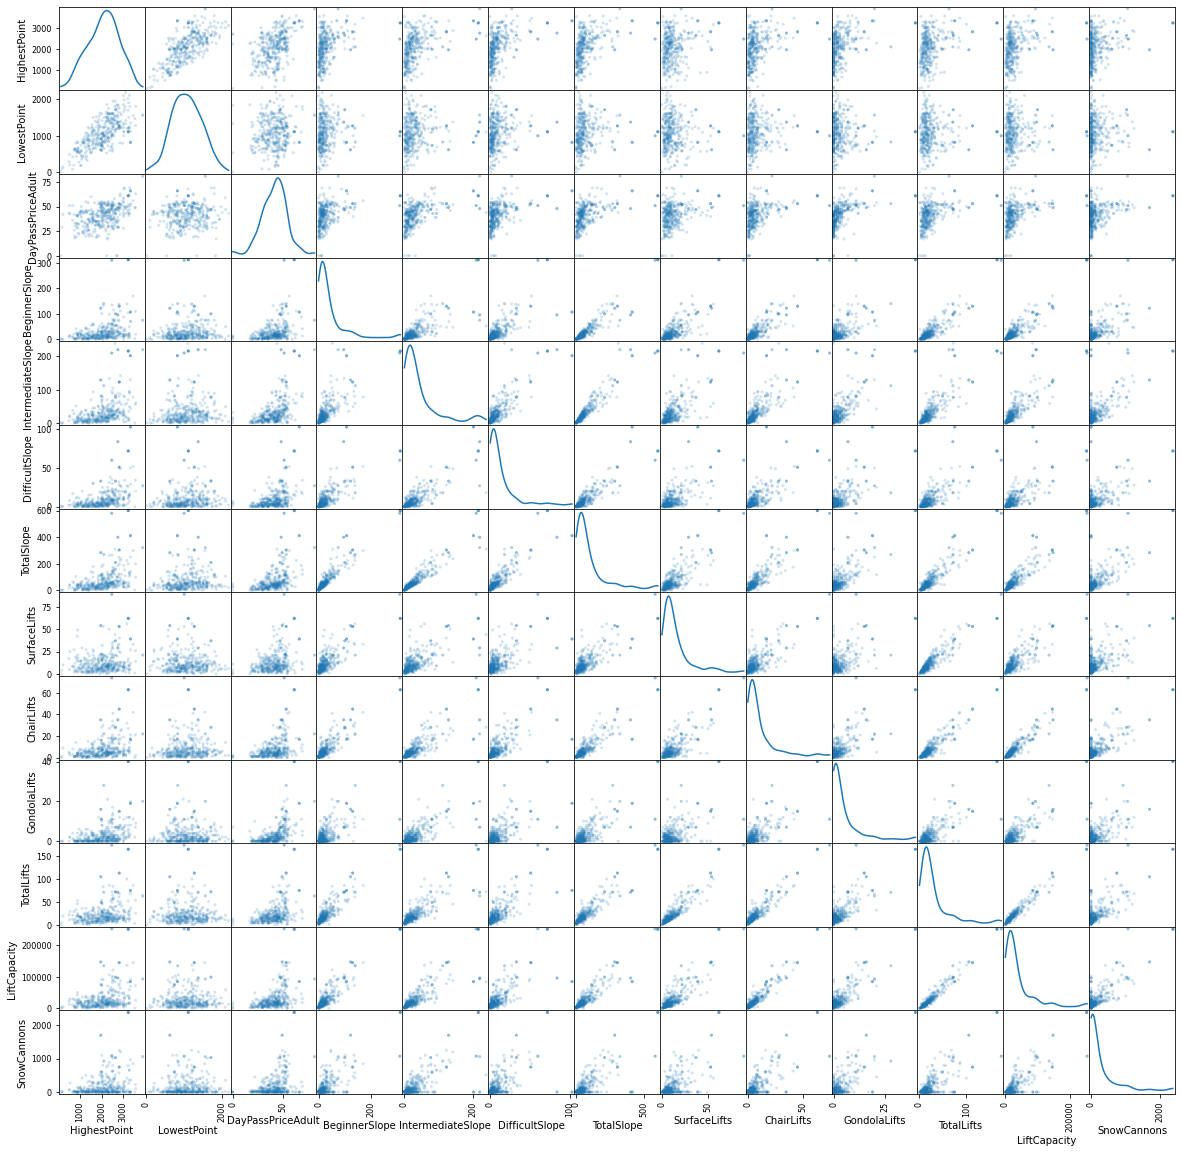

In [253]:
# your code
scatter_matrix(df_v, alpha=0.2, figsize=(20, 20),diagonal="kde")
plt.show()

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

In [254]:
# your code
corr_matrix = df.corr().abs()
corr_matrix

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
HighestPoint,1.000000,0.692213,0.471659,0.387149,0.483585,0.477639,0.468551,0.247979,0.385940,0.431615,0.363255,0.377121,0.319405
LowestPoint,0.692213,1.000000,0.087817,0.065674,0.125398,0.100448,0.120273,0.008949,0.106057,0.017171,0.052415,0.017167,0.029377
DayPassPriceAdult,0.471659,0.087817,1.000000,0.426233,0.544987,0.482408,0.517849,0.363135,0.435321,0.537821,0.460761,0.467157,0.386209
BeginnerSlope,0.387149,0.065674,0.426233,1.000000,0.800189,0.764397,0.941265,0.853456,0.921234,0.783425,0.936494,0.944505,0.802134
IntermediateSlope,0.483585,0.125398,0.544987,0.800189,1.000000,0.870685,0.951274,0.776672,0.833213,0.773219,0.860315,0.848529,0.688827
DifficultSlope,0.477639,0.100448,0.482408,0.764397,0.870685,1.000000,0.897522,0.717944,0.747063,0.709908,0.784762,0.762461,0.556167
TotalSlope,0.468551,0.120273,0.517849,0.941265,0.951274,0.897522,1.000000,0.854341,0.915974,0.819641,0.940646,0.936033,0.766644
SurfaceLifts,0.247979,0.008949,0.363135,0.853456,0.776672,0.717944,0.854341,1.000000,0.851452,0.635187,0.944269,0.890043,0.697856
ChairLifts,0.385940,0.106057,0.435321,0.921234,0.833213,0.747063,0.915974,0.851452,1.000000,0.751793,0.959328,0.966941,0.785998
GondolaLifts,0.431615,0.017171,0.537821,0.783425,0.773219,0.709908,0.819641,0.635187,0.751793,1.000000,0.811823,0.843293,0.798474


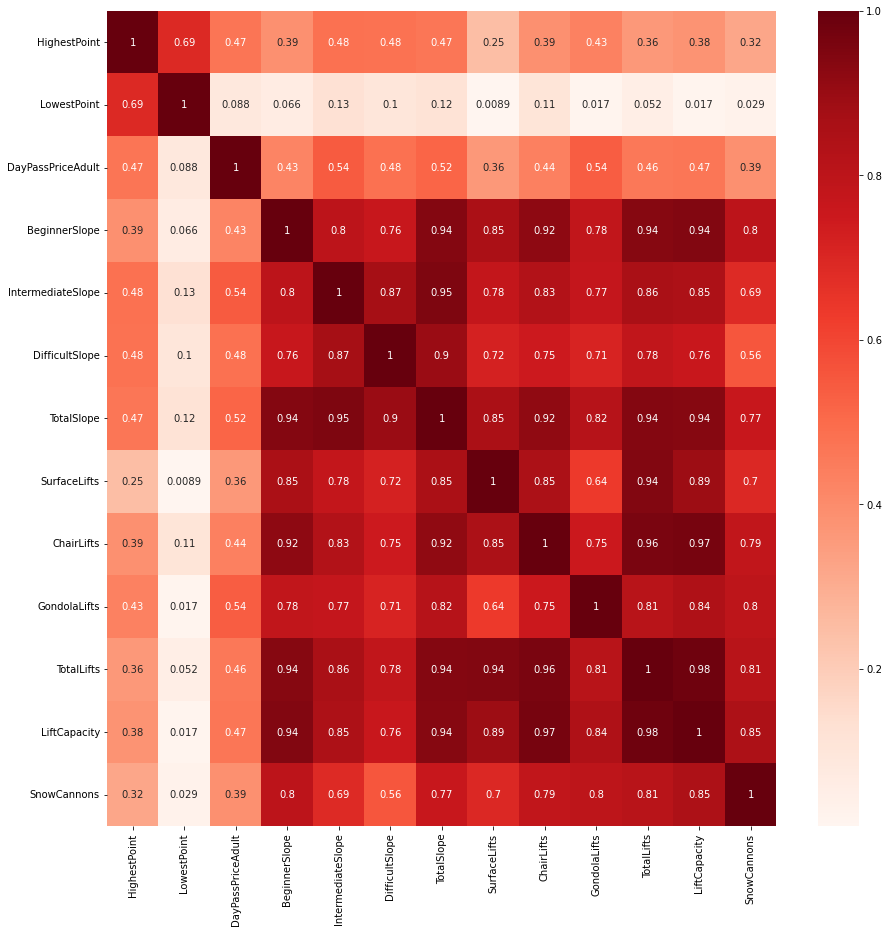

In [255]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

In [325]:
# your code
import plotly.express as px

df_v_tmp = df_v.copy()
# df_tmp
df_v_tmp = df_v_tmp.drop(['Resort', 'Country','Snowparks', 'NightSki'],axis = 1)

scalar = MinMaxScaler()
scalar.fit(df_v_tmp) #normalize feature
transformed_data_v = scalar.transform(df_v_tmp)

# transformed_data

transformed_df_v = pd.DataFrame(transformed_data_v, columns = df_v_tmp.columns, index = df_v_tmp.index)
transformed_df_v.insert(0, "Resort", df["Resort"])
transformed_df_v.insert(1, "Country", df["Country"])
transformed_df_v.insert(9, "SnowParks", df["Snowparks"])
transformed_df_v.insert(10, "NightSki", df["NightSki"])


# transformed_df_v
# transformed_df_v.describe()
fig = px.treemap(transformed_df_v, path=['Country', 'Resort'],
                 values='TotalSlope')
 
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



**Your answer for...** <br>
1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:
France(20.808), Austria(11.546), Switzerland(9.432), Italy(6.174) and Andorra(1.199)  <br>
2. The max value of TotalSlope of the five countries you identified in 1: The top slope of five contries is  1, 0.5, 0.69, 0.67 and 0.35,respectively. 

### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

In [326]:
transformed_df_v

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SnowParks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,0.492194,0.336406,0.641975,0.096154,0.338912,0.038835,0.190317,Yes,No,0.247191,0.216216,0.275,0.281609,0.298866,0.251783
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,0.666843,0.783410,0.580247,0.320513,0.322176,0.320388,0.348915,Yes,Yes,0.415730,0.378378,0.175,0.413793,0.392489,0.433068
3,Oberau (Wildschönau),Austria,0.267266,0.410138,0.370370,0.003205,0.000000,0.009709,0.001669,No,No,0.022472,0.000000,0.000,0.011494,0.007658,0.000000
4,Dachstein West,Austria,0.396930,0.354839,0.518519,0.048077,0.138075,0.029126,0.083472,Yes,Yes,0.280899,0.108108,0.075,0.206897,0.130561,0.068401
5,Rosa Khutor,Southern Russia,0.582165,0.428571,0.271605,0.096154,0.108787,0.203883,0.126878,Yes,No,0.067416,0.148649,0.250,0.155172,0.195132,0.188838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,0.695687,0.627650,0.592593,0.307692,0.920502,0.815534,0.666110,No,Yes,0.325843,0.472973,0.175,0.408046,0.382246,0.000000
373,Sauze d’Oulx (Via Lattea),Italy,0.695687,0.627650,0.592593,0.307692,0.920502,0.815534,0.666110,No,Yes,0.325843,0.472973,0.175,0.408046,0.382246,0.000000
374,Gressoney - La-Trinite (Monterosa Ski),Italy,0.834877,0.553917,0.530864,0.073718,0.393305,0.145631,0.218698,Yes,No,0.101124,0.121622,0.300,0.172414,0.126780,0.274864
375,Champoluc (Monterosa Ski),Italy,0.834877,0.553917,0.530864,0.073718,0.393305,0.145631,0.218698,Yes,No,0.101124,0.121622,0.300,0.172414,0.126780,0.274864


In [327]:
# your code
fig = px.sunburst(transformed_df_v, path=['Country', 'SnowParks', 'Resort'],values = 'TotalLifts')
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



**Your answer:**\
In the plot, we can see that the five countries of Europe such as France, Austria, Italy, Switzerland and Andorra have lots of ski resorts and the large number of lifting for people as well. Also, we can conclude that if resort has snowparks, it has large counts for lifting. And the resorts of largest five countries mostly have snowpark.

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [257]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [259]:
# your code
import pandas as pd

retail_df = pd.read_csv('datasets/retail.csv')

retail_df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,178500,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,178500,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,178500,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,178500,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,178500,United Kingdom


#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [260]:
# your code
print(f"Number of rows : {retail_df.shape[0]}")
print(f"Unique Customers: {len(retail_df.CustomerID.unique())}")
print(f"Unique Product Names: {len(retail_df.Description.unique())}")
print(f"Unique Invoices: {len(retail_df.Invoice.unique())}")
print()
unique_countries = retail_df.Country.unique()
print(f"Unique Countries: {len(unique_countries)}")
print(f"Unique Countries List: {unique_countries}")

Number of rows : 406525
Unique Customers: 4367
Unique Product Names: 3896
Unique Invoices: 22177

Unique Countries: 35
Unique Countries List: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Brazil'
 'USA' 'Bahrain' 'Malta' 'RSA']


#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [330]:
# your code

# Missing Values
retail_df.dropna(inplace=True)

# Consistency in descriptions
retail_df['Description'] = retail_df['Description'].str.strip() # remove leading and trailing whitespaces
retail_df['Description'] = retail_df['Description'].str.replace('\s+', ' ') # remove multiple whitespaces

# Remove Cancelled Transactions
retail_df.drop(retail_df[retail_df.Invoice.str.startswith('C')].index, inplace=True)

<>:8: DeprecationWarning:

invalid escape sequence \s

<>:8: DeprecationWarning:

invalid escape sequence \s

/var/folders/j8/8ppl6wh96296jgnc1sqt5lnm0000gn/T/ipykernel_71929/4110525941.py:8: DeprecationWarning:

invalid escape sequence \s

/var/folders/j8/8ppl6wh96296jgnc1sqt5lnm0000gn/T/ipykernel_71929/4110525941.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.



#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [262]:
# your code
print(f"Number of rows : {retail_df.shape[0]}")
print(f"Unique Customers: {len(retail_df.CustomerID.unique())}")
print(f"Unique Product Names: {len(retail_df.Description.unique())}")
print(f"Unique Invoices: {len(retail_df.Invoice.unique())}")
print()
unique_countries = retail_df.Country.unique()
print(f"Unique Countries: {len(unique_countries)}")
print(f"Unique Countries List: {unique_countries}")

Number of rows : 397621
Unique Customers: 4334
Unique Product Names: 3858
Unique Invoices: 18524

Unique Countries: 35
Unique Countries List: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Brazil' 'USA' 'Bahrain' 'Malta' 'RSA']


**Your answer:** <br> Property | Before | After | |--------------|-----------|------------| Number of rows | 406525 | 397621 | Unique Customers | 4367 | 4334 | Unique Product Names | 3896 | 3858 | Unique Invoices | 22177 | 18524 |

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [263]:
# your code

transaction_df = retail_df.groupby('Invoice')['Description'].apply(lambda x: x.unique())

transaction_df = transaction_df.reset_index()

transaction_df.columns = ['Invoice', 'Description']

transaction_df.head(10)

,Invoice,Description
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]
5,536370,"[ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI..."
6,536371,[PAPER CHAIN KIT 50'S CHRISTMAS]
7,536372,"[HAND WARMER RED POLKA DOT, HAND WARMER UNION ..."
8,536373,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
9,536374,[VICTORIAN SEWING BOX LARGE]


In [264]:
print(f"Number of rows: {transaction_df.shape[0]}")

Number of rows: 18524


**Your answer:** `18524`

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [265]:
# your code
te = TransactionEncoder()
te_ary = te.fit(transaction_df.Description).transform(transaction_df.Description)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

print(transactions.shape)
transactions.head(5)

(18524, 3858)


,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [266]:
# your code

# apriori(transactions, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.013064,(10 COLOUR SPACEBOY PEN),1
1,0.010041,(12 MESSAGE CARDS WITH ENVELOPES),1
2,0.014900,(12 PENCIL SMALL TUBE WOODLAND),1
3,0.016573,(12 PENCILS SMALL TUBE RED RETROSPOT),1
4,0.015709,(12 PENCILS SMALL TUBE SKULL),1
...,...,...,...
977,0.011769,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG SUKI DES...",3
978,0.014306,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",3
979,0.010041,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...",3
980,0.012902,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",4


In [267]:
frequent_itemsets[(frequent_itemsets['length'] >= 3)].head(5)

,support,itemsets,length
923,0.011607,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",3
924,0.014414,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",3
925,0.014630,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",3
926,0.021054,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",3
927,0.016843,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...",3


In [268]:
itemsets = frequent_itemsets['itemsets']

itemsets_counts = itemsets.value_counts()

# Create a new dataframe from the surname_counts Series
itemsets_support_counts = pd.DataFrame({'itemset': itemsets_counts.index, 'support_count': itemsets_counts.values})

itemsets_support_counts

,itemset,support_count
0,(10 COLOUR SPACEBOY PEN),1
1,"(BLUE DINER WALL CLOCK, RED DINER WALL CLOCK)",1
2,"(BLUE HARMONICA IN BOX, RED HARMONICA IN BOX)",1
3,"(BLUE STRIPE CERAMIC DRAWER KNOB, RED STRIPE C...",1
4,"(CANDLEHOLDER PINK HANGING HEART, WHITE HANGIN...",1
...,...,...
977,(PAPER CHAIN KIT 50'S CHRISTMAS),1
978,(PAPER CHAIN KIT EMPIRE),1
979,(PAPER CHAIN KIT RETROSPOT),1
980,(PAPER CHAIN KIT VINTAGE CHRISTMAS),1


In [269]:
max(itemsets_support_counts['support_count'].to_list())

1

**Your answer:** `1`

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [270]:
# your code

rule_conf_p6 = arule(frequent_itemsets, metric="confidence", min_threshold=0.6)
rule_conf_p6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.017383,0.042593,0.011337,0.652174,15.311622,0.010596,2.752544
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.017383,0.047290,0.012200,0.701863,14.841686,0.011378,3.195548
2,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.019380,0.042593,0.011876,0.612813,14.387522,0.011051,2.472726
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.047290,0.042593,0.028612,0.605023,14.204617,0.026597,2.423954
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.042593,0.047290,0.028612,0.671736,14.204617,0.026597,2.902271
...,...,...,...,...,...,...,...,...,...
145,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...","(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.020190,0.023537,0.012902,0.639037,27.150297,0.012427,2.705164
146,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...",(LUNCH BAG BLACK SKULL.),0.015062,0.056791,0.010419,0.691756,12.180697,0.009564,3.059945
147,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...",(LUNCH BAG PINK POLKADOT),0.014144,0.050259,0.010419,0.736641,14.656866,0.009708,3.606262
148,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",(LUNCH BAG CARS BLUE),0.016627,0.052149,0.010419,0.626623,12.016119,0.009552,2.538593


In [271]:
rule_conf_p9 = arule(frequent_itemsets, metric="confidence", min_threshold=0.9)
rule_conf_p9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.012092,0.014576,0.010905,0.901786,61.869180,0.010729,10.033411
1,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...",(POPPY'S PLAYHOUSE KITCHEN),0.011067,0.018678,0.010041,0.907317,48.575553,0.009834,10.587943
2,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.014306,0.037303,0.012902,0.901887,24.177353,0.012369,9.812104


**Your answer:** `The number of rules decreases when we make our criterion(confidence) stricter(from 0.6 to 0.9)`

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [272]:
# your code

rules_conf_p6_desc = rule_conf_p6.sort_values(by='lift', ascending=False)

# Select the top 3 rows
top_2 = rules_conf_p6_desc.head(2)
top_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE PINK),0.014576,0.012092,0.010905,0.748148,61.86918,0.010729,3.922574
54,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.012092,0.014576,0.010905,0.901786,61.86918,0.010729,10.033411


**Your answer:** `These two rules are the exact complements of each other. Between the two items Regency Tea Plates Pink/Green, buying one item automatically supports buying the other. However the confidence and conviction is higher in the first rule.`

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:**
- Right now we are looking at items bought at the same time - having the same Invoice ID.
- If we consider Customer ID, then we would be looking at items bought by the same customer, regardless of time

### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [333]:
import pandas as pd 
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [282]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [283]:
# your code
retail_sequences.Sequence.head()

0    [['white hanging heart t-light holder', 'white...
1    [['assorted colour bird ornament', "poppy's pl...
2    [['alarm clock bakelike pink', 'alarm clock ba...
3    [["paper chain kit 50's christmas"], ['biscuit...
4    [['victorian sewing box large'], ['victorian s...
Name: Sequence, dtype: object

## Question 4: Text Mining (12 pts)

In [334]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline

### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [285]:
# your code
import pandas as pd

friends_df = pd.read_csv('datasets/FRIENDS.csv')

friends_df.head()

,character,line
0,Monica,There's nothing to tell! He's just some guy I...
1,Joey,C'mon you're going out with the guy! There's...
2,Chandler,All right Joey be nice. So does he have a h...
3,Phoebe,Wait does he eat chalk?
4,Phoebe,Just 'cause I don't want her to go through ...


#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

In [286]:
# your code

character_counts = friends_df.groupby('character').size().reset_index(name='number of lines')

character_counts

,character,number of lines
0,Chandler,7687
1,Joey,7573
2,Monica,7651
3,Phoebe,6833
4,Rachel,8506
5,Ross,8264


<AxesSubplot:xlabel='character', ylabel='number of lines'>

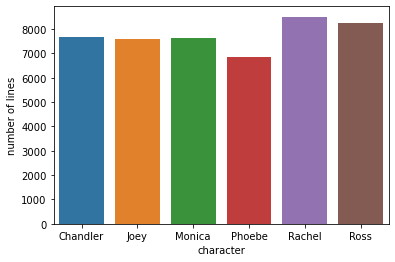

In [287]:
import seaborn as sns

sns.barplot(x='character', y='number of lines', data=character_counts)

**Your answer:** Rachel and Ross have spoken the most number of lines, Pheoebe has the least, while the rest of the three are more or less equal.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [288]:
# your code
corpus = friends_df['line'].tolist()
# corpus = friends_df[['character', 'line']].values.tolist()

corpus[:5]

[" There's nothing to tell! He's just some guy I work with!",
 " C'mon  you're going out with the guy! There's gotta be something wrong with him!",
 ' All right Joey  be nice.  So does he have a hump? A hump and a hairpiece?',
 ' Wait  does he eat chalk?',
 " Just  'cause  I don't want her to go through what I went through with Carl- oh!"]

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [336]:
# your code

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download('omw-1.4')

stopwords = set(STOPWORDS)
# print(stopwords)
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/samjanity996/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [337]:
def my_preprocessor(line):
    tokens = simple_preprocess(line)

    tokens = [token for token in tokens if token not in stopwords]
    # print(tokens)

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [338]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samjanity996/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [339]:
print(corpus[0])
print(my_preprocessor(corpus[0]))

 There's nothing to tell! He's just some guy I work with!
tell guy work


#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [294]:
# your code
print(corpus[:5])
corpus_p = [my_preprocessor(line) for line in corpus]
print(corpus_p[:5])

[" There's nothing to tell! He's just some guy I work with!", " C'mon  you're going out with the guy! There's gotta be something wrong with him!", ' All right Joey  be nice.  So does he have a hump? A hump and a hairpiece?', ' Wait  does he eat chalk?', " Just  'cause  I don't want her to go through what I went through with Carl- oh!"]
['tell guy work', 'mon going guy gotta wrong', 'right joey nice hump hump hairpiece', 'wait eat chalk', 'cause want went carl oh']


#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [295]:
# your code
friends_df.head()

,character,line
0,Monica,There's nothing to tell! He's just some guy I...
1,Joey,C'mon you're going out with the guy! There's...
2,Chandler,All right Joey be nice. So does he have a h...
3,Phoebe,Wait does he eat chalk?
4,Phoebe,Just 'cause I don't want her to go through ...


In [296]:
from sklearn.model_selection import train_test_split

X = friends_df.drop('character', axis=1)
y = friends_df['character']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [297]:
X_train.head()
# y_train.head()

,line
27569,Okay. Okay fine y’know what? We will let Ros...
14664,Ewwwww!
22154,Phoebe’s…
7802,Umm you’ve got some on your pants.
11255,It's okay. How's the soup?


#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [298]:
# your code
corpus_train = X_train['line'].tolist()
corpus_test = X_test['line'].tolist()

# corpus_train[:5]
corpus_test[:5]

[" He's probably in his room with his current girlfriend Charlie. That's the situation as we know it... ",
 ' Ohhhh ',
 ' We live together. You’re having our baby. I’m not gonna see anybody else. Are you-are you sure you don’t want something more?',
 "  O-kay... I mean  don't I deserve anything? I mean  a few tears  a cursory hug?  NOT FROM YOU! ",
 " Ooh  and it's so nice having this little sink here..."]

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [299]:
# your code

corpus_preprocessed = [my_preprocessor(line) for line in corpus]

cv = CountVectorizer()

cv_encoding = cv.fit_transform(corpus_preprocessed)

In [300]:
print(type(cv_encoding))
print(cv_encoding[:5])

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 9749)	1
  (0, 4211)	1
  (0, 10927)	1
  (1, 4211)	1
  (1, 6225)	1
  (1, 4027)	1
  (1, 4071)	1
  (1, 10972)	1
  (2, 8094)	1
  (2, 5082)	1
  (2, 6499)	1
  (2, 4652)	2
  (2, 4239)	1
  (3, 10590)	1
  (3, 2946)	1
  (3, 1551)	1
  (4, 1507)	1
  (4, 10626)	1
  (4, 10725)	1
  (4, 1449)	1
  (4, 6680)	1


#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [301]:
# your code
print("\n Original Line")
print(friends_df.head(1).line)

print("\n Preprocessed")
print(corpus_p[0])

print("\nEncoded")
print(cv_encoding[0])


 Original Line
0     There's nothing to tell! He's just some guy I...
Name: line, dtype: object

 Preprocessed
tell guy work

Encoded
  (0, 9749)	1
  (0, 4211)	1
  (0, 10927)	1


**Your answer:** The set of words encoding leads to a sparse matrix because we have a huge vocab and sentences would usually contain very few words. Also, with stop word removal, lemmatization, this decreases futher. We are just stornig frequency of occurence of words which may not lead to a very good model

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [344]:
# your code
corpus_train[:5]

[' Okay. Okay fine  y’know what? We will let Ross and Joey decide.   Hiiiii  Ross! Sweetie.',
 ' Ewwwww!',
 ' Phoebe’s…',
 ' Umm  you’ve got some on your pants.',
 " It's okay. How's the soup?"]

In [345]:
corpus_train_preprocessed = [my_preprocessor(line) for line in corpus_train]

cv_train_encoded = cv.transform(corpus_train_preprocessed)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [347]:
# your code
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log')
clf.fit(cv_train_encoded, y_train)

SGDClassifier(loss='log')

In [348]:
predicted_labels_train = clf.predict(cv_train_encoded)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, predicted_labels_train)
print('Train Accuracy:', accuracy_train)

Train Accuracy: 0.41718846577624896


In [349]:
corpus_test_preprocessed = [my_preprocessor(line) for line in corpus_test]
cv_test_encoded = cv.transform(corpus_test_preprocessed)

predicted_labels_test = clf.predict(cv_test_encoded)

accuracy_test = accuracy_score(y_test, predicted_labels_test)
print('Test Accuracy:', accuracy_test)

Test Accuracy: 0.2887240675051059


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:** `We got an accuracy of 0.28, which is very low. I think if we had used a random guesser, it would've given us an accuracy of 1/6, which is around 0.16. Acutally, considering the line cound distribution from a(ii), it will be even less than 0.16 as it would predict Pheobe's lines more than it needs to, and Rachel/Ross's lines less than it needs to.`

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [369]:
# your code

friends_df.head(2)

,character,line,preprocessed_line
0,Monica,There's nothing to tell! He's just some guy I...,"[there, nothing, to, tell, he, just, some, guy..."
1,Joey,C'mon you're going out with the guy! There's...,"[mon, you, re, going, out, with, the, guy, the..."


In [370]:
lines = friends_df.head(2)['line'].to_list()
lines_prep = [my_preprocessor(line) for line in lines]
lines_enc = cv.transform(lines_prep)
predictions = clf.predict(lines_enc)

predictions

array(['Monica', 'Rachel'], dtype='<U8')

| Line | Original | Predicted |
|--------------|-----------|------------|
1 | Monica | Monica |
2 | Joey | Rachel |

### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [352]:
# your code
corpus_p[:5]

['tell guy work',
 'mon going guy gotta wrong',
 'right joey nice hump hump hairpiece',
 'wait eat chalk',
 'cause want went carl oh']

In [353]:
corpus_p[1].split()

['mon', 'going', 'guy', 'gotta', 'wrong']

In [354]:
tagged_data = [TaggedDocument(words=sentence.split(), tags=[i]) for i, sentence in enumerate(corpus_p)]

tagged_data[:5]

[TaggedDocument(words=['tell', 'guy', 'work'], tags=[0]),
 TaggedDocument(words=['mon', 'going', 'guy', 'gotta', 'wrong'], tags=[1]),
 TaggedDocument(words=['right', 'joey', 'nice', 'hump', 'hump', 'hairpiece'], tags=[2]),
 TaggedDocument(words=['wait', 'eat', 'chalk'], tags=[3]),
 TaggedDocument(words=['cause', 'want', 'went', 'carl', 'oh'], tags=[4])]

In [355]:
model_d2v = Doc2Vec(vector_size=10, min_count=3, epochs=10)
model_d2v.build_vocab(tagged_data)
model_d2v.train(tagged_data, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

In [356]:
print(corpus[10])
print(corpus_p[10])
vector = model_d2v.infer_vector(corpus_p[10].split())
print(vector)

 That's right.
right
[ 0.02107487 -0.01472466  0.04334976  0.00528269  0.0351834  -0.00172628
 -0.01665214  0.05614221 -0.03148384  0.02201371]


#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [357]:
# your code
r = 121
random_row = list(friends_df.iloc[r, :])
random_line = random_row[1]
random_line

" My brother's going through that right now  he's such a mess. How did you get through it?"

In [358]:
line_p = my_preprocessor(random_line)
print(line_p)
input_vector = model_d2v.infer_vector(line_p.split())
print(input_vector)

brother going right mess
[-0.02119079 -0.05375656  0.0590526  -0.02559695  0.05532018 -0.03562742
 -0.01817119  0.06967779 -0.07198355 -0.04002812]


In [359]:
from gensim.matutils import cossim

max_similarity = -1
closest_sentence = ""
closest_sentence_index = 0

for i in range(len(corpus_p)):
    sentence = corpus_p[i]
    sentence_split = sentence.split()
    if (len(sentence_split)>3):  #min_count = 3
        print(sentence)
        this_vector = model_d2v.infer_vector(sentence_split)
        print(vector)
        similarity = cossim(input_vector, this_vector)
        if similarity > max_similarity:
            max_similarity = similarity
            closest_sentence = sentence
            closest_sentence_index = i

# print("Closest sentence preprocessed:", closest_sentence)
print("Closest sentence:", corpus[closest_sentence_index])
print("Character :", list(friends_df.iloc[closest_sentence_index, :])[0])


# Something wrong with gensim cosine similarity. I can't figure it out. Therefore used sklearn in the next cell.

mon going guy gotta wrong
[ 0.02107487 -0.01472466  0.04334976  0.00528269  0.0351834  -0.00172628
 -0.01665214  0.05614221 -0.03148384  0.02201371]


TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [360]:
from sklearn.metrics.pairwise import cosine_similarity

max_similarity = -1
closest_sentence = ""
closest_sentence_index = 0

for i in range(len(corpus_p)):
    sentence = corpus_p[i]
    sentence_split = sentence.split()
    if (sentence!=line_p and len(sentence_split)>3):  # not the same sentence as input, min_count = 3
        # print(sentence)
        this_vector = model_d2v.infer_vector(sentence_split)
        # print(this_vector)
        similarity = cosine_similarity(input_vector.reshape(1, -1), this_vector.reshape(1, -1))
        if similarity > max_similarity:
            max_similarity = similarity
            closest_sentence = sentence
            closest_sentence_index = i

print("Closest sentence preprocessed:", closest_sentence)
print("Closest sentence:", corpus[closest_sentence_index])
print("Character :", list(friends_df.iloc[closest_sentence_index, :])[0])

Closest sentence preprocessed: kidding look failed marriage okay gonna guy
Closest sentence:  I’m-I’m not kidding. Look I-I  I can’t have three failed marriages. I can’t. Okay? I-I am not gonna be that guy!
Character : Ross


**Your answer:**  <br> At first it returned the same sentence that we had passed as input, as it has the highest similarity.
Then, after adding the condition to not let it happen, it worked.

| Sentence | Character | Line |
|--------------|-----------|------------|
| Original | Monica | My brother's going through that right now  he's such a mess. How did you get through it? |
|Closest |Pheobe|Hey listen let me ask you  do you believe in soul mates?|

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [361]:
# your code

import pandas as pd
from gensim.utils import simple_preprocess


def preprocess(line):
    line_p = simple_preprocess(line)
    return line_p
    # return ' '.join(word for word in line_p)


friends_df = pd.read_csv('datasets/FRIENDS.csv')
friends_df['preprocessed_line'] = friends_df['line'].apply(preprocess)

friends_df.head()

,character,line,preprocessed_line
0,Monica,There's nothing to tell! He's just some guy I...,"[there, nothing, to, tell, he, just, some, guy..."
1,Joey,C'mon you're going out with the guy! There's...,"[mon, you, re, going, out, with, the, guy, the..."
2,Chandler,All right Joey be nice. So does he have a h...,"[all, right, joey, be, nice, so, does, he, hav..."
3,Phoebe,Wait does he eat chalk?,"[wait, does, he, eat, chalk]"
4,Phoebe,Just 'cause I don't want her to go through ...,"[just, cause, don, want, her, to, go, through,..."


In [362]:
monica_lines = friends_df.loc[friends_df['character'] == 'Monica']
monica_lines_corpus = monica_lines['preprocessed_line'].tolist()
monica_lines_corpus[:1]

[['there',
  'nothing',
  'to',
  'tell',
  'he',
  'just',
  'some',
  'guy',
  'work',
  'with']]

In [363]:
joey_lines = friends_df.loc[friends_df['character'] == 'Joey']
joey_lines_corpus = joey_lines['preprocessed_line'].tolist()

chandler_lines = friends_df.loc[friends_df['character'] == 'Chandler']
chandler_lines_corpus = chandler_lines['preprocessed_line'].tolist()

phoebe_lines = friends_df.loc[friends_df['character'] == 'Phoebe']
phoebe_lines_corpus = phoebe_lines['preprocessed_line'].tolist()

rachel_lines = friends_df.loc[friends_df['character'] == 'Rachel']
rachel_lines_corpus = rachel_lines['preprocessed_line'].tolist()

ross_lines = friends_df.loc[friends_df['character'] == 'Ross']
ross_lines_corpus = ross_lines['preprocessed_line'].tolist()

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [364]:
# your code
monica_train_data, monica_padded_sents = padded_everygram_pipeline(3, monica_lines_corpus)

from nltk.lm import MLE

model_monica = MLE(3)
model_monica.fit(monica_train_data, monica_padded_sents)

In [365]:
joey_train_data, joey_padded_sents = padded_everygram_pipeline(3, joey_lines_corpus)
model_joey = MLE(3)
model_joey.fit(joey_train_data, joey_padded_sents)

chandler_train_data, chandler_padded_sents = padded_everygram_pipeline(3, chandler_lines_corpus)
model_chandler = MLE(3)
model_chandler.fit(chandler_train_data, chandler_padded_sents)

phoebe_train_data, pheobe_padded_sents = padded_everygram_pipeline(3, phoebe_lines_corpus)
model_phoebe = MLE(3)
model_phoebe.fit(phoebe_train_data, pheobe_padded_sents)

rachel_train_data, rachel_padded_sents = padded_everygram_pipeline(3, rachel_lines_corpus)
model_rachel = MLE(3)
model_rachel.fit(rachel_train_data, rachel_padded_sents)

ross_train_data, ross_padded_sents = padded_everygram_pipeline(3, ross_lines_corpus)
model_ross = MLE(3)
model_ross.fit(ross_train_data, ross_padded_sents)

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [366]:
# your code
print("Monica :", model_monica.generate(random_seed=101, num_words=10))
print("Joey :", model_joey.generate(random_seed=101, num_words=10))
print("Chandler :", model_chandler.generate(random_seed=11, num_words=10))
print("Pheobe :", model_phoebe.generate(random_seed=11, num_words=10))
print("Rachel :", model_rachel.generate(random_seed=101, num_words=10))
print("Ross :", model_ross.generate(random_seed=110, num_words=10))

Monica : ['know', 'he', 'too', 'charming', 'but', 'if', 'it', 'gets', 'little', 'extra']
Joey : ['let', 'go', 'watch', 'it', 'at', 'work', 'got', 'me', 'for', 'sorry']
Chandler : ['get', 'past', 'this', 'because', 'of', 'the', 'champagne', 'that', 'she', 'was']
Pheobe : ['gonna', 'have', 'to', 'go', 'out', 'with', 'girl', '</s>', '</s>', '</s>']
Rachel : ['like', 'going', 'on', 'with', 'you', 'guys', 'been', 'listening', 'this', 'entire']
Ross : ['which', 'is', 'what', 'happens', 'when', 'people', 'live', 'on', 'the', 'figure']


## Question 5: Process Mining (22pts)

In [26]:
#pip install pm4py==2.5.0

In [25]:
#pm4py.__version__

In [2]:
import pandas as pd
import pm4py

In [3]:
from pm4py.statistics.traces.generic.log import case_statistics

In [4]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [5]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [160]:
# your code
reimburse = pd.read_csv('datasets/reimburse.csv')
display(reimburse.head())
df = pm4py.format_dataframe(reimburse, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
display(df.head())
log = pm4py.convert_to_event_log(df)

,Timestamp,CaseId,Activity,ModelTime,Resource,Brand
0,2020-06-01 06:00:00,0,Online,0,111,PEAR
1,2020-06-01 06:16:43,1,Online,1003,111,CP
2,2020-06-01 08:21:49,2,App,8509,111,CP
3,2020-06-01 09:19:59,0,Register Low,11999,1,PEAR
4,2020-06-01 09:26:51,0,Ask if Reimbursement,12411,1,PEAR


/var/folders/j8/8ppl6wh96296jgnc1sqt5lnm0000gn/T/ipykernel_71929/587594142.py:4: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  df = pm4py.format_dataframe(reimburse, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')


,Timestamp,CaseId,Activity,ModelTime,Resource,Brand,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,2020-06-01 06:00:00+00:00,0,Online,0,111,PEAR,0,Online,2020-06-01 06:00:00+00:00,0,0
1,2020-06-01 09:19:59+00:00,0,Register Low,11999,1,PEAR,0,Register Low,2020-06-01 09:19:59+00:00,1,0
2,2020-06-01 09:26:51+00:00,0,Ask if Reimbursement,12411,1,PEAR,0,Ask if Reimbursement,2020-06-01 09:26:51+00:00,2,0
3,2020-06-03 09:52:18+00:00,0,Pay,186738,2,PEAR,0,Pay,2020-06-03 09:52:18+00:00,3,0
4,2020-06-01 06:16:43+00:00,1,Online,1003,111,CP,1,Online,2020-06-01 06:16:43+00:00,4,1


/opt/anaconda3/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [161]:
# your code

print(f'Number of events: {len(df)}')
print(f'Number of cases: {len(df.CaseId.unique())}') #len(log)
print(f'Earliest timestamp: {reimburse.iloc[0,0]}')
print(f'Latest timestamp: {reimburse.iloc[-1,-1]}')
#print(f'Latest timestamp: {reimburse.iloc[len(df)-1,0]}')

variants = pm4py.get_variants_as_tuples (log)
variants = [(k, len(v)) for k, v in variants.items()]
variants = sorted(variants, key=lambda x: x[1], reverse=True)
#display([v[0] for v in variants[0:10]])
print(f'Number of trace variants: {len(variants)}')

Number of events: 47830
Number of cases: 10000
Earliest timestamp: 2020-06-01 06:00:00+00:00
Latest timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [162]:
# your code
# quesion1
df['time_diff'] = (df['Timestamp'] - df['Timestamp'].shift()).dt.microseconds/1000
count = len(df[df['time_diff']<100])
print(count, "events occur almost at the same time")

47829 events occur almost at the same time


In [163]:
# question2
print("It is not possible to determine if there are resources that complete two activities at the same time (within less than 100ms). The log file provided consists of a list of dictionaries, each representing a case in the event log, and each case has two keys: 'attributes' and 'events'. The 'events' key is a list of dictionaries, each representing an event in the case and contains information such as 'Timestamp', 'CaseId', 'Activity', 'ModelTime', 'Resource', 'Brand', etc. The time difference between each event is calculated using the 'Timestamp' attribute, But, it is not clear if there is a relationship between the resource and the activity.\n")
print("In order to determine if there are resources that complete two activities at the same time, I need additional information about the relationship between resources and activities")

It is not possible to determine if there are resources that complete two activities at the same time (within less than 100ms). The log file provided consists of a list of dictionaries, each representing a case in the event log, and each case has two keys: 'attributes' and 'events'. The 'events' key is a list of dictionaries, each representing an event in the case and contains information such as 'Timestamp', 'CaseId', 'Activity', 'ModelTime', 'Resource', 'Brand', etc. The time difference between each event is calculated using the 'Timestamp' attribute, But, it is not clear if there is a relationship between the resource and the activity.

In order to determine if there are resources that complete two activities at the same time, I need additional information about the relationship between resources and activities


In [164]:
# question3
count = len(df[(df['time_diff']<100) & (df['CaseId'] != df['CaseId'].shift())])
print(count, "cases are there in which two activities are executed at the same time")

9999 cases are there in which two activities are executed at the same time


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

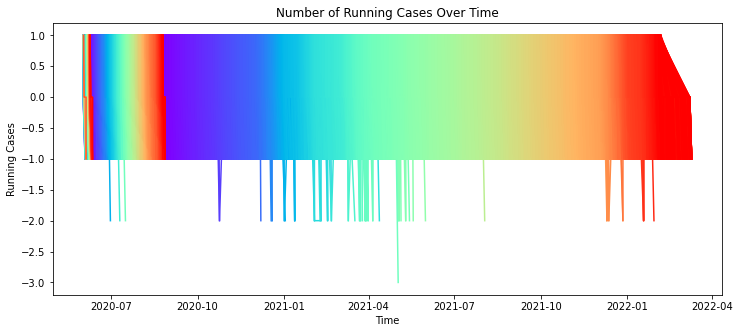

In [165]:
# your code
import numpy as np

# Convert the timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a column that indicates the start and end of each case
df['CaseStart'] = (df.groupby('CaseId')['Timestamp'].transform('first') == df['Timestamp']).astype(int)
df['CaseEnd'] = (df.groupby('CaseId')['Timestamp'].transform('last') == df['Timestamp']).astype(int)

# Create a running cases column that counts the number of running cases at each timestamp
df['RunningCases'] = df.groupby(['Timestamp'])['CaseStart'].cumsum() - df.groupby(['Timestamp'])['CaseEnd'].cumsum()

# Assign a unique color to each case
colors = plt.cm.rainbow(np.linspace(0, 1, len(df.CaseId.unique())))
df['CaseColor'] = [colors[i] for i in df.CaseId]

# Create a plot that shows the number of running cases over time
plt.figure(figsize=(12,5))
for case, color in zip(df.CaseId.unique(), colors):
    plt.plot(df[df.CaseId == case].Timestamp, df[df.CaseId == case].RunningCases, color=color)
plt.xlabel('Time')
plt.ylabel('Running Cases')
plt.title('Number of Running Cases Over Time')
plt.show()

In [175]:
df.groupby(['Timestamp'])['CaseEnd'].cumsum()

0        0
1        0
2        0
3        1
4        0
        ..
47825    1
47826    0
47827    0
47828    0
47829    1
Name: CaseEnd, Length: 47830, dtype: int64

In [11]:
from pm4py.statistics.traces.generic.log import case_statistics

all_case_durations = case_statistics.get_all_case_durations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [12]:
case_dur = pd.DataFrame(all_case_durations)
case_dur

,0
0,177975.0
1,178096.0
2,178753.0
3,178963.0
4,179051.0
...,...
9995,12231773.0
9996,12402379.0
9997,12783705.0
9998,12933323.0


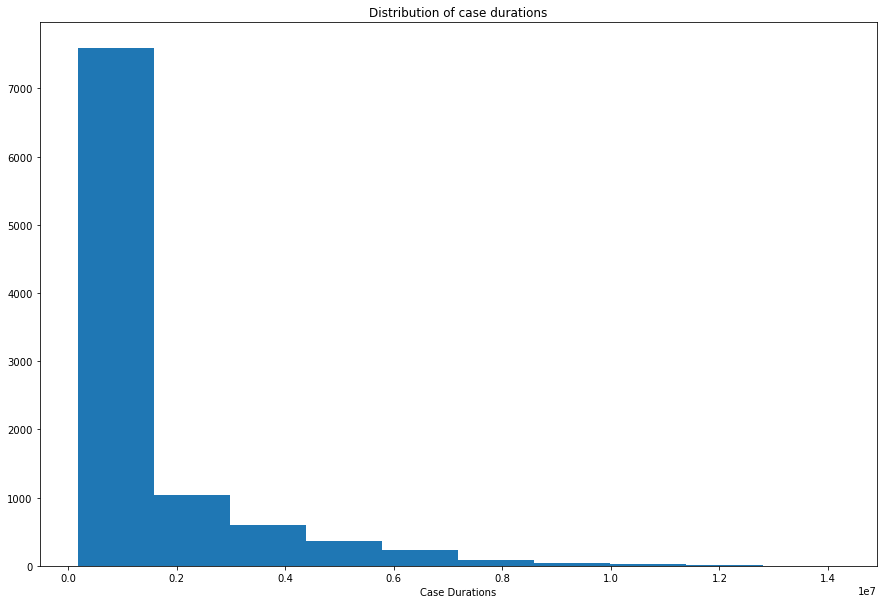

In [13]:
plt.figure(figsize=(15,10))
plt.hist(case_dur)
plt.title('Distribution of case durations')
plt.xlabel('Case Durations')
plt.show()

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

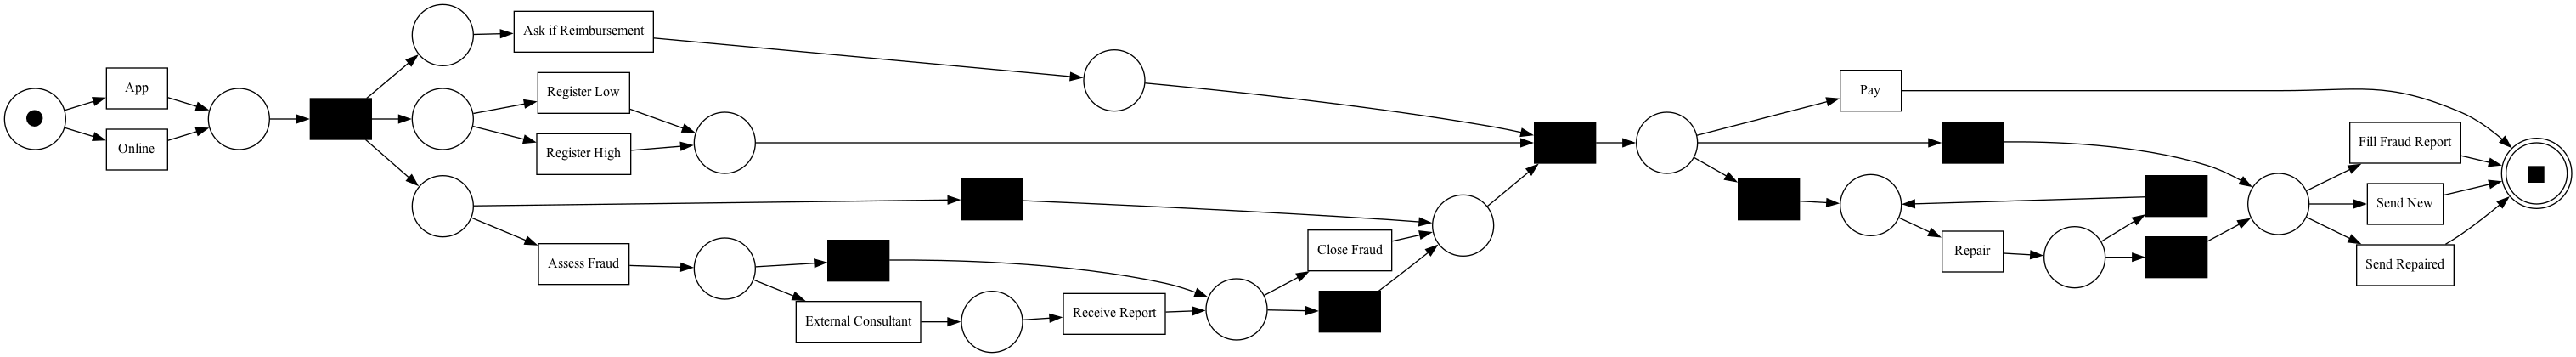

In [15]:
# your code
# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [16]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator

token_replay_result = token_based_replay.apply(log, net, im, fm)
display(token_replay_result[0])

# Computing the fitness of the discovered Petri net (at the log level)
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

{'trace_is_fit': True,
 'trace_fitness': 1.0,
 'activated_transitions': [(3c88dc87-8bf4-4c01-9795-ef84541e0152, 'Online'),
  (tauSplit_1, None),
  (03c30979-79ab-4605-9380-98166c252622, 'Register Low'),
  (3d4a105d-be0f-473b-a47d-19bbc822d1ce, 'Ask if Reimbursement'),
  (skip_3, None),
  (tauJoin_2, None),
  (53f95f8b-a49b-49fc-8c37-860c574f2511, 'Pay')],
 'reached_marking': ['sink:1'],
 'enabled_transitions_in_marking': set(),
 'transitions_with_problems': [],
 'missing_tokens': 0,
 'consumed_tokens': 10,
 'remaining_tokens': 0,
 'produced_tokens': 10}

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [110]:
df['Activity'].value_counts()

Ask if Reimbursement    10000
Register Low             7021
Online                   6993
Send New                 4405
Repair                   4152
Pay                      3949
App                      3007
Register High            2979
Assess Fraud             1917
Close Fraud              1563
Send Repaired            1292
Fill Fraud Report         354
External Consultant        99
Receive Report             99
Name: Activity, dtype: int64

In [27]:
# your code
log_low = pm4py.filter_event_attribute_values(log, "Activity", ["Register Low"], level="case", retain=True)
print(f'How many traces does the resulting log log_low contain? {len(log_low)}')

How many traces does the resulting log log_low contain? 7021


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

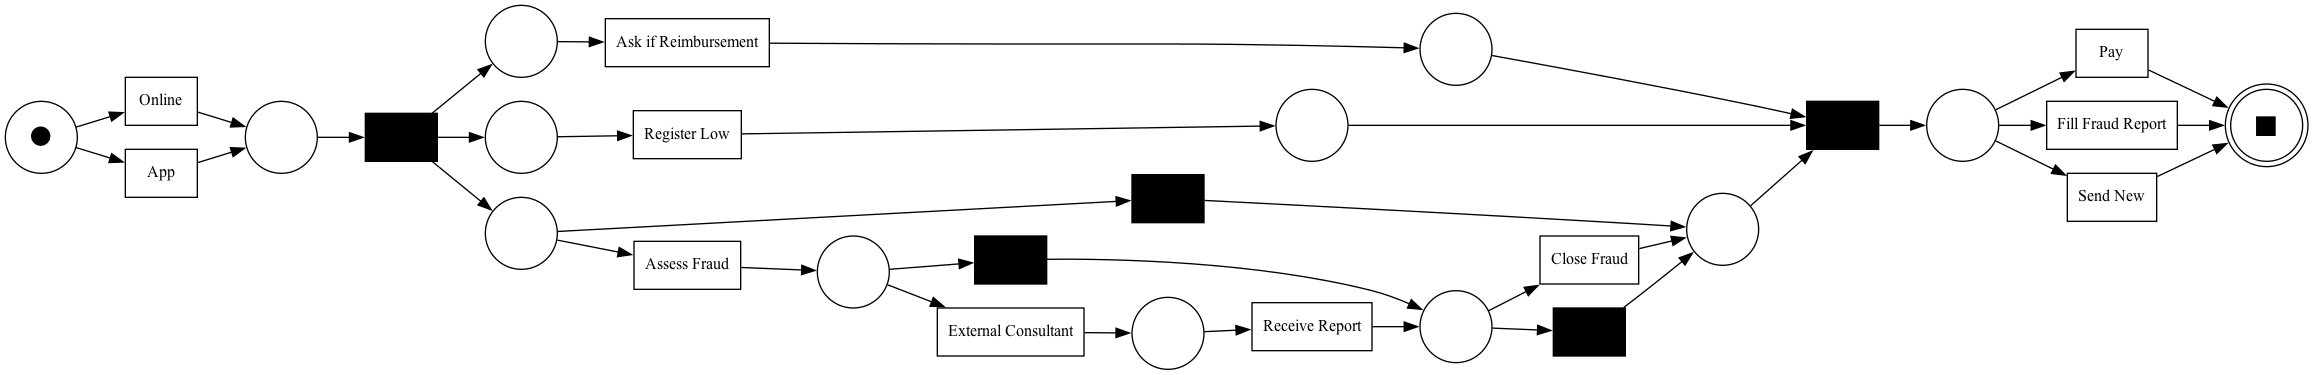

In [20]:
# your code
#Discover a Petri net for log_low
net_low, im_low, fm_low = pm4py.discover_petri_net_inductive(log_low)
pm4py.view_petri_net(net_low, im_low, fm_low, format='png') 

In [109]:
#compute its fitness
token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log_low, net_low, im_low, fm_low)
display(token_replay_result[0])

fitness_low = replay_fitness_evaluator.apply(log_low, net_low, im_low, fm_low, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness_low)

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

{'trace_is_fit': True,
 'trace_fitness': 1.0,
 'activated_transitions': [(d440e099-b078-4f7a-bf4f-d680a5ee9066, 'Online'),
  (tauSplit_1, None),
  (5332e221-7785-4a09-b5c2-8a1073fb896d, 'Register Low'),
  (2dd91561-411a-4773-93ba-8909b88de58c, 'Ask if Reimbursement'),
  (skip_3, None),
  (tauJoin_2, None),
  (fbdc7e48-e193-48a5-a270-7381d19a3142, 'Pay')],
 'reached_marking': ['sink:1'],
 'enabled_transitions_in_marking': set(),
 'transitions_with_problems': [],
 'missing_tokens': 0,
 'consumed_tokens': 10,
 'remaining_tokens': 0,
 'produced_tokens': 10}

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)
`We filter the activity "Register low", and we discover the activities "Repair" and "Send Repair" are filtered on the Petri net somehow. I infer the trace included "Register low" also include "Repair" and "Send Repair".`

**Your answer**: *(Relate your observations to precision here.)* `In my case, both average fitness of models are 1.0. I guess the activity "Register low" does not affect the precision of model too much.`

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



In [30]:
# your code
# load the Petri net and the event log
net_conf, im_conf, fm_conf = pm4py.read_pnml("datasets/pn_conf.apnml")
log_conf = pm4py.read_xes('datasets/log_conf.xes')

#net_conf, im_conf, fm_conf = pm4py.discover_petri_net_inductive(log_conf)
#pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png') 

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [31]:
fitness_conf = replay_fitness_evaluator.apply(log_conf, net_conf, im_conf, fm_conf, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness_conf)

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

{'perc_fit_traces': 91.01,
 'average_trace_fitness': 0.9892081818181783,
 'log_fitness': 0.9892890758104679,
 'percentage_of_fitting_traces': 91.01}

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [32]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})
#display(place_fitness)
place_fitness = pd.DataFrame(place_fitness)
place_fitness

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

,n5,n3,n4,n2,n6,n8,n9,n1,n7,n10,n11
underfed_traces,{},{},{},{},{},{},{},"{[[concept:name], [concept:name], [concept:nam...",{},{},{}
overfed_traces,{},{},{},{},{},{},{},{},{},{},{}
m,0,0,0,0,0,0,0,44,0,0,0
r,0,0,0,0,0,0,0,899,0,0,0
c,10000,99,1917,10000,10000,10000,1917,10000,10000,10000,10000
p,10000,99,1917,10000,10000,10000,1917,10000,10000,10000,10000


#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [71]:
# your code
#Computing token counts
token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log_conf, net_conf, im_conf, fm_conf)

# Search a few unfitting traces
for i in range(11):
    if token_replay_result[i]["trace_is_fit"] == False:
        print("'trace_is_fit': False is found")
    else:
        print("not found")

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

not found
not found
'trace_is_fit': False is found
not found
not found
not found
not found
not found
not found
'trace_is_fit': False is found
not found


In [66]:
display(token_replay_result[2])

{'trace_is_fit': False,
 'trace_fitness': 0.9,
 'activated_transitions': [(n18, 'Online'),
  (n12, 'Ask if Reimbursement'),
  (n21, None),
  (n13, 'Assess Fraud'),
  (n22, 'Register High'),
  (n25, None),
  (n17, 'Close Fraud'),
  (n16, 'Finalize')],
 'reached_marking': ['n1:1', 'n5:1'],
 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')},
 'transitions_with_problems': [(n12, 'Ask if Reimbursement')],
 'missing_tokens': 1,
 'consumed_tokens': 10,
 'remaining_tokens': 1,
 'produced_tokens': 10}

In [67]:
display(token_replay_result[9])

{'trace_is_fit': False,
 'trace_fitness': 0.875,
 'activated_transitions': [(n18, 'Online'),
  (n12, 'Ask if Reimbursement'),
  (n21, None),
  (n19, 'Register Low'),
  (n23, None),
  (n16, 'Finalize')],
 'reached_marking': ['n1:1', 'n5:1'],
 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')},
 'transitions_with_problems': [(n12, 'Ask if Reimbursement')],
 'missing_tokens': 1,
 'consumed_tokens': 8,
 'remaining_tokens': 1,
 'produced_tokens': 8}

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*  Both cases of the deviation I show are in the transition (n12, 'Ask if Reimbursement'). `It appears that there is a missing token that is required to enable the transition (n12, 'Ask if Reimbursement'), which caused the deviation in the process trace.`

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*) `In my both cases of individual place, there are deviations in the process trace specifically in the transition (n12, 'Ask if Reimbursement'). The deviation is related to the token counts of the individual places in the Petri net model, as it is caused by the missing token that is required to enable the transition. The deviation can be caused by an empty or missing token in one of the places connected to the transition (n12, 'Ask if Reimbursement'). To understand the deviation better, it would be necessary to examine the places that are connected to the transition (n12, 'Ask if Reimbursement') and determine which place is missing a token and causing the deviation in the process trace. Additionally, the 'trace_fitness' value of 0.9 and 0.875 indicate that the process trace fits the model to some degree, but not entirely.`

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


In [122]:
# your code
from pm4py.algo.filtering.log.end_activities import end_activities_filter

#log_fraud = end_activities_filter.apply(log, ['Fill Fraud Report'])
log_fraud = pm4py.filter_event_attribute_values(log, "concept:name", 
                                               ['Fill Fraud Report'], level="case", retain=True)

#dfg, start_activities, end_activities = pm4py.discover_directly_follows_graph(log_fraud) 

#pm4py.view_dfg(dfg, start_activities, end_activities)

#net_fraud, im_fraud, fm_fraud = pm4py.discover_petri_net_inductive(log_fraud)
#pm4py.view_petri_net(net_fraud, im_fraud, fm_fraud, format='png') 

#fitness_fraud = replay_fitness_evaluator.apply(log_fraud, net_fraud, im_fraud , fm_fraud, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
#display(fitness_fraud)

In [135]:
temp = df.filter(items=['CaseId','Brand','concept:name'])

#temp1 = pd.get_dummies(temp, columns = ["Brand", "concept:name"])
temp1 = pd.get_dummies(temp, columns = ["concept:name"])
temp2 = temp1.filter(items=['CaseId','Brand','concept:name_Fill Fraud Report'])
display(temp2.head())

,CaseId,Brand,concept:name_Fill Fraud Report
0,0,PEAR,0
1,0,PEAR,0
2,0,PEAR,0
3,0,PEAR,0
4,1,CP,0


<AxesSubplot:xlabel='Brand', ylabel='count'>

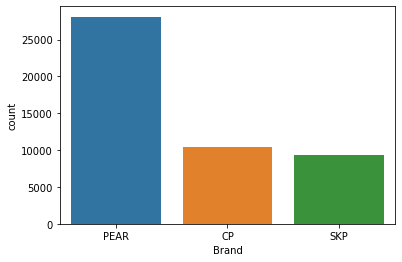

In [136]:
#create a bar plot showing the number of products of a certain brand involved in the fraud
import seaborn as sns 
sns.countplot(data=temp2, x="Brand")

**Your answer:** (*Describe the plot in two to three sentences.*)

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [151]:
# your code (for a short additional analysis)

# Create a new DataFrame with the one-hot encoded "concept:name" column as the only independent variable and "Brand" as the dependent variable
temp3 = temp2[['concept:name_Fill Fraud Report','Brand']]
temp3 = pd.get_dummies(temp2, columns = ["Brand"])
temp3 = temp3.filter(items=['concept:name_Fill Fraud Report','Brand_CP', 'Brand_PEAR','Brand_SKP'])
temp3

,concept:name_Fill Fraud Report,Brand_CP,Brand_PEAR,Brand_SKP
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
47825,1,1,0,0
47826,0,1,0,0
47827,0,1,0,0
47828,0,1,0,0


In [157]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Apply the Apriori algorithm to find association rules with a minimum support of 0.5 and 
#a minimum confidence of 0.8
frequent_itemsets = apriori(temp3, min_support=0.5, use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

print(association_rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)* `Even though I try to tune the lower value of minimum support and minimum confidence, I still get empty result. I assume this dataset does not contain the necessary information for the association rule.`

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [266]:
# your code
data = pd.read_csv("datasets/berkeley.csv")
data.head()

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [269]:
# your code
data = data.drop(columns=['Year'])

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [272]:
# your code
table_aggregated = pd.pivot_table(data=data,index=['Gender'], columns=['Admission'], aggfunc='count')
table_aggregated

Major         
Admission Accepted Rejected
Gender                     
F             1494     2827
M             3738     4704

**Your answer:**

In [287]:
print("The admission rate for female is " + str(1494/(1494+2827)*100) + "%.")
print("The admission rate for male is " + str(3783/(3783+4704)*100) + "%.")

The admission rate for female is 34.57532978477204%.
The admission rate for male is 44.57405443619653%.


**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [277]:
# your code
table_combine = pd.pivot_table(data=data,index=['Gender', 'Major'], columns=['Admission'], aggfunc={'Admission': 'count'})
table_combine

Admission         
Admission     Accepted Rejected
Gender Major                   
F      A            89       19
       B            17        8
       C           201      392
       D           131      244
       E            94      299
       F            25      316
       Other       937     1549
M      A           825      313
       B           353      207
       C           120      205
       D           138      279
       E            53      138
       F            22      351
       Other      2227     3211

**Your answer:**

In [288]:
print("The admission rate of female for major A is " + str(89/(89+19)*100) + "%.")
print("The admission rate of female for major B is " + str(17/(17+8)*100) + "%.")
print("The admission rate of female for major C is " + str(201/(201+392)*100) + "%.")
print("The admission rate of female for major D is " + str(131/(131+244)*100) + "%.")
print("The admission rate of female for major E is " + str(94/(94+299)*100) + "%.")
print("The admission rate of female for major F is " + str(25/(25+316)*100) + "%.")
print("The admission rate of female for other major is " + str(937/(937+1549)*100) + "%.")

The admission rate of female for major A is 82.4074074074074%.
The admission rate of female for major B is 68.0%.
The admission rate of female for major C is 33.895446880269816%.
The admission rate of female for major D is 34.93333333333333%.
The admission rate of female for major E is 23.918575063613233%.
The admission rate of female for major F is 7.331378299120235%.
The admission rate of female for other major is 37.69106999195495%.


In [289]:
print("The admission rate of male for major A is " + str(825/(825+313)*100) + "%.")
print("The admission rate of male for major B is " + str(353/(353+207)*100) + "%.")
print("The admission rate of male for major C is " + str(120/(120+205)*100) + "%.")
print("The admission rate of male for major D is " + str(138/(138+279)*100) + "%.")
print("The admission rate of male for major E is " + str(53/(53+138)*100) + "%.")
print("The admission rate of male for major F is " + str(22/(22+351)*100) + "%.")
print("The admission rate of male for other major is " + str(2227/(2227+3211)*100) + "%.")

The admission rate of male for major A is 72.49560632688929%.
The admission rate of male for major B is 63.035714285714285%.
The admission rate of male for major C is 36.92307692307693%.
The admission rate of male for major D is 33.093525179856115%.
The admission rate of male for major E is 27.748691099476442%.
The admission rate of male for major F is 5.898123324396782%.
The admission rate of male for other major is 40.95255608679661%.


**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:** In general, the admission rate of female is lower than the male. However, if we consider each major carefully, the admission rate of female is higher than the male except for other major. Obviously, it is the case of Simpson's paradox and there exists a sex bias. The number of male is much more than the female could be the hidden factor behind this bias.

## Question 7: Big Data (15pts)

In [15]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:** `With the recursive form, one can compute the mean on small chunks of data as they are received, and update the overall mean using the previous mean and the number of data points received so far. This allows for the mean to be computed in real-time, without having to wait for all of the data to be collected. Additionally, as the data is processed incrementally, it also reduces the memory and computational requirements for storing and processing the data.`

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:** 

1. The first map function would have the signature:
$map_1: Activity \times LifecycleTransition \rightarrow (Activity \times ExecutionTime)^*$

, where $Activity$ is a set of activities, $LifecycleTransition$ is a set of lifecycle transitions (start and complete), and $ExecutionTime$ is the time difference between the complete and the start lifecycle transition of each activity execution.

2. The first reduce function would have the signature:
$reduce_1: Activity \times (ExecutionTime)^* \rightarrow (Activity \times ExecutionTime)^*$

3. The second map function would have the signature:
$map_2: Activity \times ExecutionTime \rightarrow (Activity \times 1)^*$

,where $1$ is a placeholder for a single value

4. The second reduce function would have the signature:
$reduce_2: Activity \times (1)^* \rightarrow (Activity \times MeanExecutionTime)$

,where $MeanExecutionTime$ is the mean execution time of the activity.

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [229]:
# your code (nasa_mapper1.py)
import sys

# Create an empty dictionary to store start_timestamp and complete_timestamp for each execution_id
timestamps = {}

# input comes from STDIN
for line in sys.stdin:
    # remove white space and split row into values
    line_split = line.strip().split("\t")
    
    # assign case, activity, timestamp, lifecycle_transition, execution_id
    case = line_split[0]
    activity = line_split[1]
    timestamp = line_split[2]
    lifecycle_transition = line_split[3]
    execution_id = line_split[4]
    
    if lifecycle_transition == "start":
        timestamps[execution_id] = {"start_timestamp": timestamp}
    elif lifecycle_transition == "complete":
        timestamps[execution_id]["complete_timestamp"] = timestamp
        execution_time = timestamps[execution_id]["complete_timestamp"] - timestamps[execution_id]["start_timestamp"]
        # write the result to STDOUT
        print('%s\t%s\t%s' % (execution_id, activity, execution_time))

In [177]:
# your code (nasa_reducer1.py)
import sys

current_activity = None
execution_times = {}

# input comes from STDIN
for line in sys.stdin:
    # remove white space and split row into values
    line_split = line.strip().split("\t")
    
    # assign activity, execution_id, and execution_time
    activity, execution_id, execution_time = line_split[0], line_split[1], line_split[2]
    
    if activity != current_activity:
        # output the result of the previous activity
        if current_activity:
            for execution_id, execution_time in execution_times[current_activity].items():
                print('%s\t%s\t%s' % (current_activity, execution_id, execution_time))
        current_activity = activity
        execution_times[current_activity] = {}
    if execution_id not in execution_times[current_activity]:
        execution_times[current_activity][execution_id] = execution_time
    else:
        execution_times[current_activity][execution_id] += execution_time
        
# output the last activity
if current_activity == activity:
    for execution_id, execution_time in execution_times[activity].items():
        print('%s\t%s\t%s' % (activity, execution_id, execution_time))

In [178]:
# your code (nasa_mapper2.py)
import sys

# input comes from STDIN
for line in sys.stdin:
    # remove white space and split row into values
    line_split = line.strip().split("\t")
    
    # assign activity and execution_time
    activity, execution_id, execution_time = line_split[0], line_split[1], line_split[2]
    
    # write the result to STDOUT
    print('%s\t%s' % (activity, 1))

In [179]:
# your code (nasa_reducer2.py)
import sys

current_activity = None
count = 0
total_execution_time = 0

# input comes from STDIN
for line in sys.stdin:
    # remove white space and split row into values
    line_split = line.strip().split("\t")
    
    # assign activity and count
    activity, execution_time = line_split[0], line_split[1]
    
    if activity != current_activity:
        # output the result of the previous activity
        if current_activity:
            mean_execution_time = total_execution_time / count
            print('%s\t%s' % (current_activity, mean_execution_time))
        current_activity = activity
        count = 0
        total_execution_time = 0
    count += 1
    total_execution_time += execution_time
        
# output the last activity
if current_activity == activity:
    mean_execution_time = total_execution_time / count
    print('%s\t%s' % (activity, mean_execution_time))

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [180]:
# your matriculation number here
matr_nb = 429195

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

In [ ]:
from IPython.display import Image
# your code
# Image(filename='filename_screenshot_of_a1')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a2')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a3')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a4')